In [1]:
# Import packages and convert our csv files into a dataframes
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('../classification_train.csv')
test = pd.read_csv('../classification_test.csv')

In [2]:
# Define features and target
features = [
    'homes_sold', 'inventory', 'median_dom',
    'off_market_in_two_weeks', 'avg_sale_to_list', 'sold_above_list',
    'median_sale_price_mom', 'median_sale_price_yoy',
    'homes_sold_yoy', 'inventory_yoy', 'median_dom_yoy',
    'year', 'state_NC',
    'Q_1', 'Q_2', 'Q_3', 'Q_4'
]

X_train = train[features]
y_train = train['market_phase_encoded']
X_test = test[features]
y_test = test['market_phase_encoded']

=== Decision Tree Results ===
Accuracy: 0.9936280366387893
Classification Report:
               precision    recall  f1-score   support

        COLD       0.98      0.98      0.98       279
      STABLE       0.98      0.97      0.98       307
         HOT       1.00      1.00      1.00      1925

    accuracy                           0.99      2511
   macro avg       0.99      0.98      0.98      2511
weighted avg       0.99      0.99      0.99      2511



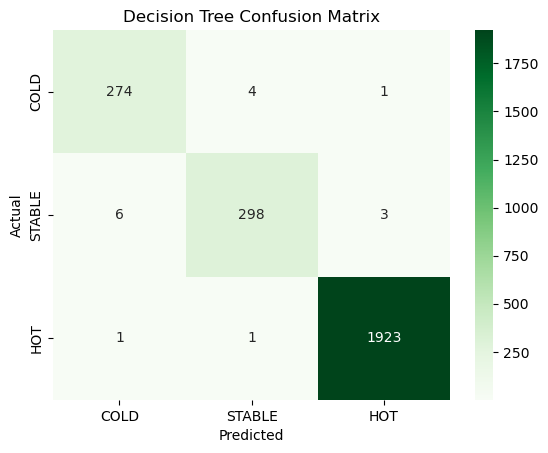

In [3]:
# Decision tree classification
dt = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=None,    # let it fully grow
    random_state=42
)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
dt_report = classification_report(y_test, dt_preds, target_names=['COLD','STABLE','HOT'])

print("=== Decision Tree Results ===")
print("Accuracy:", dt_acc)
print("Classification Report:\n", dt_report)

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_preds)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['COLD', 'STABLE', 'HOT'],
            yticklabels=['COLD', 'STABLE', 'HOT'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Random Forest Results ===
Accuracy: 0.9920350457984867
Classification Report:
               precision    recall  f1-score   support

        COLD       0.97      1.00      0.98       279
      STABLE       0.99      0.94      0.97       307
         HOT       1.00      1.00      1.00      1925

    accuracy                           0.99      2511
   macro avg       0.99      0.98      0.98      2511
weighted avg       0.99      0.99      0.99      2511



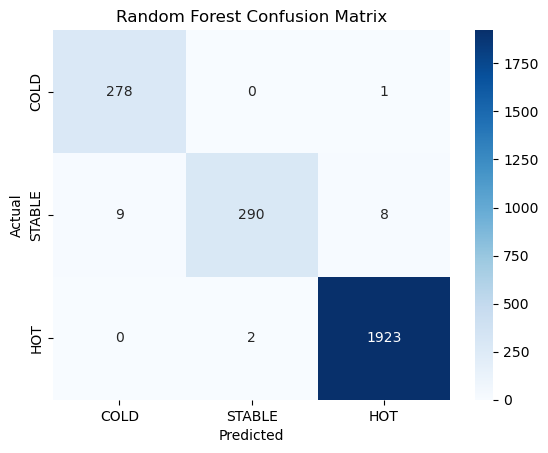

In [4]:
# Random forest classification
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds, target_names=['COLD','STABLE','HOT'])

print("=== Random Forest Results ===")
print("Accuracy:", rf_acc)
print("Classification Report:\n", rf_report)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['COLD', 'STABLE', 'HOT'],
            yticklabels=['COLD', 'STABLE', 'HOT'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== SVM Results ===
Accuracy: 0.7666268418956591
Classification Report:
               precision    recall  f1-score   support

        COLD       0.00      0.00      0.00       279
      STABLE       0.00      0.00      0.00       307
         HOT       0.77      1.00      0.87      1925

    accuracy                           0.77      2511
   macro avg       0.26      0.33      0.29      2511
weighted avg       0.59      0.77      0.67      2511



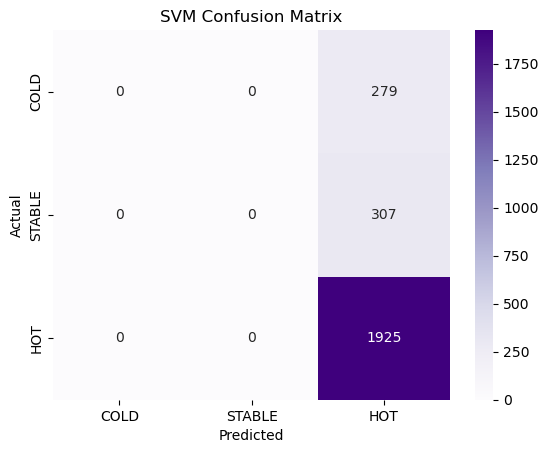

In [5]:
# Support vector machine (SVM) classification
svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

svm_acc = accuracy_score(y_test, svm_preds)
svm_report = classification_report(y_test, svm_preds, target_names=['COLD','STABLE','HOT'], zero_division=0)

print("=== SVM Results ===")
print("Accuracy:", svm_acc)
print("Classification Report:\n", svm_report)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['COLD', 'STABLE', 'HOT'],
            yticklabels=['COLD', 'STABLE', 'HOT'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [6]:
# Model accuracy comparison
print("\n=== MODEL ACCURACY COMPARISON ===")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SVM Accuracy:           {svm_acc:.4f}")


=== MODEL ACCURACY COMPARISON ===
Decision Tree Accuracy: 0.9936
Random Forest Accuracy: 0.9920
SVM Accuracy:           0.7666
